# Data Parser 

In [1]:
import pandas as pd
import numpy as np
import glob
from nested_dict import nested_dict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_ans = nested_dict()

In [3]:
# Testnet / Exp 1 / (avg, std, gas)
path = "../experiments/*.csv"
for fname in glob.glob(path):
    # Parse file name
    second_slash_pos = fname.index("/",3)
    underscore_pos = fname.index("_")
    hash_pos = fname.index("#")
    
    # Locate Testnet and Experiment Number
    testnet = fname[second_slash_pos+1:underscore_pos]
    expNum = fname[hash_pos+1:hash_pos+3].rstrip()
#     print(testnet, expNum)

    # Parse data
    df = pd.read_csv(fname, names=range(10))
    gas = df[5][1] # conventional gas usage
    avg = df.mean(axis=1)[0]
    std = df.std(axis=1)[0]
#     print(avg, std, gas)
    
    # Collect data
    df_ans[testnet][expNum]["avg"] = avg
    df_ans[testnet][expNum]["std"] = std
    df_ans[testnet][expNum]["gas"] = gas

In [4]:
df_ans['Ropsten']['5']['gas']

37700

In [5]:
# Testnet / Exp 1 / (avg, std, gas)
Data = df_ans

# Data Plotter 

In [6]:
TEST_NETS = ["Ropsten", "Rinkeby", "Kovan"]

NUM_1_TO_10 = range(10)
NUM_2_TO_4 = [2,3,4]
NUM_5_TO_10 = range(5,11)

STR_1_TO_10 = [str(x) for x in NUM_1_TO_10]
STR_2_TO_4 = [str(x) for x in NUM_2_TO_4]
STR_5_TO_10 = [str(x) for x in NUM_5_TO_10]

CLIENT_NUM_1_TO_100 = [1,5,10,20,50,100]
CLIENT_NUM_1_TO_10 = [1,5,10]

CLIENT_STR_1_TO_100 = [str(x) for x in [1,5,10,20,50,100]]
CLIENT_STR_1_TO_10 = [str(x) for x in [1,5,10]]

In [7]:
# Define a function for a bar plot
def barplot(x_data, y_data, error_data, x_label, y_label, title, set_color):
    _, ax = plt.subplots()
#     ax.set_xticklabels(x_data)
#     ax.bar(x_data, y_data, color = set_color, align = 'center')
    ax.bar(range(len(y_data)), y_data, color = set_color, align = 'center', tick_label=x_data)

    if (error_data != 'None'):
        ax.errorbar(range(len(y_data)), y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

In [38]:
# Define a function for a bar plot
def barplotTriple(x_data, y_data_list, error_data, x_label, y_label, title, set_color_list, set_width, set_legend_list):
    _, ax = plt.subplots()
    length = len(y_data_list[0])
#     ax.set_xticklabels(x_data)
#     ax.bar(x_data, y_data, color = set_color, align = 'center')
    bar = [0,0,0]
    bar[0] = ax.bar([x - set_width for x in range(length)], y_data_list[0], color = set_color_list[0], align = 'center', tick_label=x_data, width=set_width)
    bar[1] = ax.bar(range(length), y_data_list[1], color = set_color_list[1], align = 'center', tick_label=x_data, width=set_width)
    bar[2] = ax.bar([x + set_width for x in range(length)], y_data_list[2], color = set_color_list[2], align = 'center', tick_label=x_data, width=set_width)
#     if (error_data != 'None'):
#         ax.errorbar(range(len(y_data)), y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    
    ax.legend(bar, set_legend_list)
    
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

## Custodian Deployment Latency

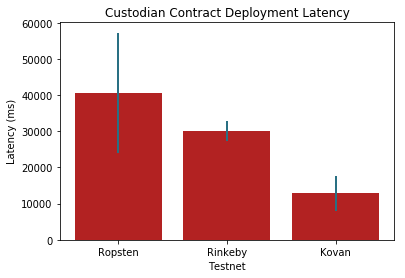

In [9]:
barplot(x_data = TEST_NETS
        , y_data = [Data[net]['1']['avg'] for net in TEST_NETS]
        , error_data = [Data[net]['1']['std'] for net in TEST_NETS]
        , x_label = 'Testnet'
        , y_label = 'Latency (ms)'
        , title = 'Custodian Contract Deployment Latency'
        , set_color = 'firebrick')
plt.show()

## Custodian Deployment Gas Usage

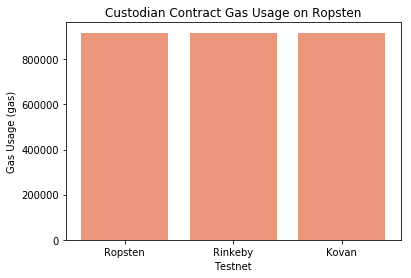

In [10]:
barplot(x_data = TEST_NETS
        , y_data = [Data["Ropsten"]['1']['gas'] for net in TEST_NETS]
        , error_data = 'None'
        , x_label = 'Testnet'
        , y_label = 'Gas Usage (gas)'
        , title = 'Custodian Contract Gas Usage on ' + "Ropsten"
        , set_color = 'darksalmon')
plt.show()

## Client Deployment Latency across testnets

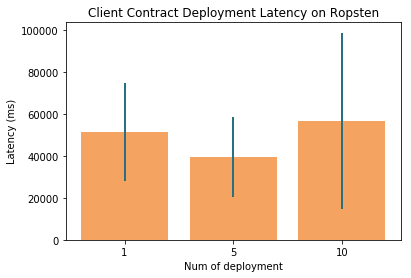

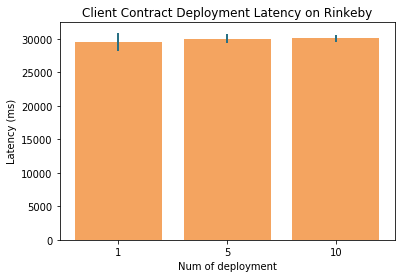

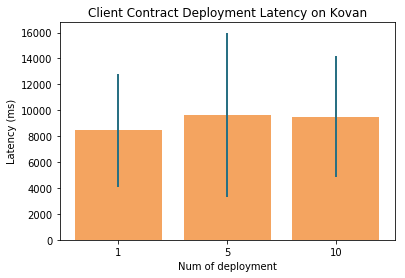

In [11]:
for net in TEST_NETS:
    barplot(x_data = CLIENT_STR_1_TO_10
            , y_data = [Data[net][num]['avg'] for num in STR_2_TO_4]
            , error_data = [Data[net][num]['std'] for num in STR_2_TO_4]
            , x_label = "Num of deployment"
            , y_label = 'Latency (ms)'
            , title = 'Client Contract Deployment Latency on ' + net
            , set_color = 'sandybrown')
    plt.show()

## Client Deployment Gas Usage

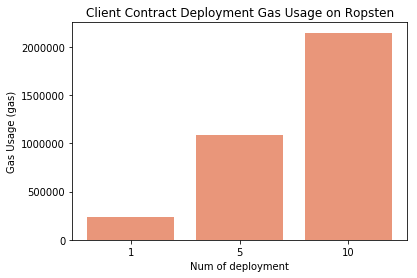

In [12]:
barplot(x_data = CLIENT_STR_1_TO_10
        , y_data = [Data["Ropsten"][num]['gas'] for num in STR_2_TO_4]
        , error_data = 'None'
        , x_label = 'Num of deployment'
        , y_label = 'Gas Usage (gas)'
        , title = 'Client Contract Deployment Gas Usage on ' + "Ropsten"
        , set_color = 'darksalmon')
plt.show()

## Client Update State Latency

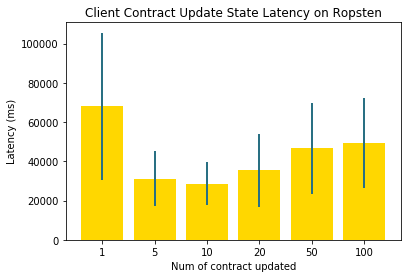

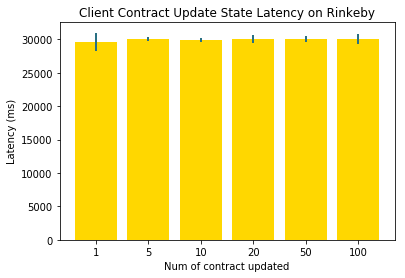

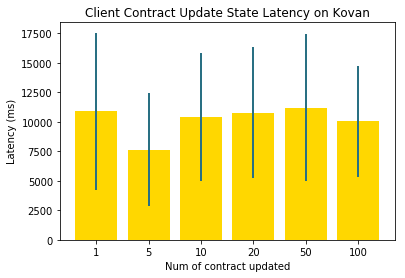

In [13]:
for net in TEST_NETS:
    barplot(x_data = CLIENT_STR_1_TO_100
            , y_data = [Data[net][num]['avg'] for num in STR_5_TO_10]
            , error_data = [Data[net][num]['std'] for num in STR_5_TO_10]
            , x_label = 'Num of contract updated'
            , y_label = 'Latency (ms)'
            , title = 'Client Contract Update State Latency on ' + net
            , set_color = 'gold')
    plt.show()

## Client Update State Gas Usage

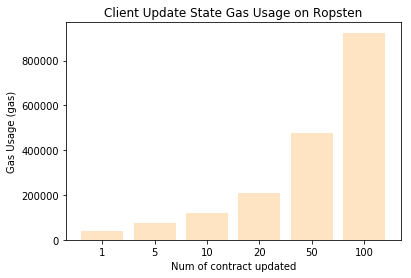

In [14]:
barplot(x_data = CLIENT_STR_1_TO_100
        , y_data = [Data["Ropsten"][num]['gas'] for num in STR_5_TO_10]
        , error_data = "None"
        , x_label = 'Num of contract updated'
        , y_label = 'Gas Usage (gas)'
        , title = 'Client Update State Gas Usage on ' + "Ropsten"
        , set_color = 'bisque')
plt.show()

## Client Update State Latency across testnets

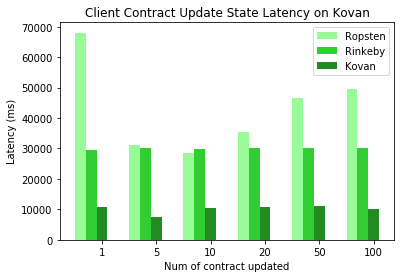

In [45]:
barplotTriple(x_data = CLIENT_STR_1_TO_100
        , y_data_list = [[Data[net][num]['avg'] for num in STR_5_TO_10] for net in TEST_NETS]
        , error_data = "None"
        , x_label = 'Num of contract updated'
        , y_label = 'Latency (ms)'
        , title = 'Client Contract Update State Latency on ' + net
        , set_color_list = ['palegreen','limegreen','forestgreen']
        , set_width = 0.2
        , set_legend_list = TEST_NETS)
plt.show()

## Client Deployment Latency across testnets

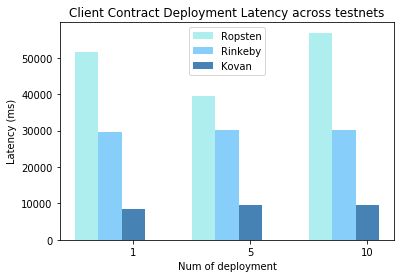

In [41]:
barplotTriple(x_data = CLIENT_STR_1_TO_10
        , y_data_list = [[Data[net][num]['avg'] for num in STR_2_TO_4] for net in TEST_NETS]
        , error_data = "None"
        , x_label = 'Num of deployment'
        , y_label = 'Latency (ms)'
        , title = 'Client Contract Deployment Latency across testnets'
        , set_color_list = ['paleturquoise','lightskyblue','steelblue']
        , set_width = 0.2
        , set_legend_list = TEST_NETS)
plt.show()

## Custodian Deployment Latency across testnets